# Ch3 Linear Regression

Simple Linear Regression

In [110]:
from sklearn.datasets import load_boston
from sklearn import linear_model
boston_data = load_boston()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from mpl_toolkits.mplot3d import axes3d
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
ad= pd.read_csv('Dataset/Advertising.csv').drop('Unnamed: 0', axis=1)
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5,0,'TV')

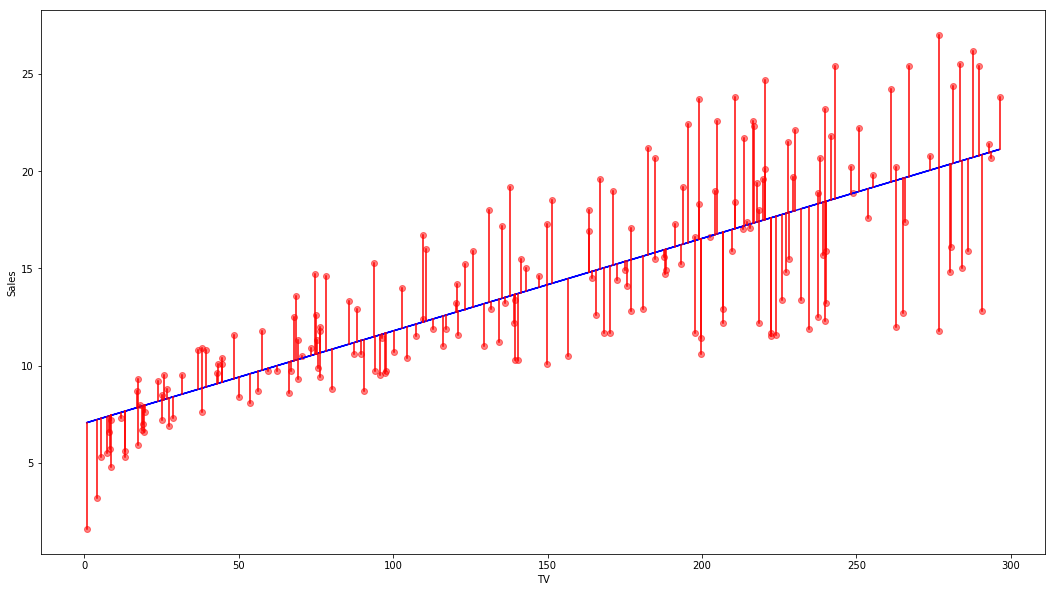

In [26]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter('TV','Sales', data= ad, color='red', alpha =0.5)
x= ad.TV
m,b= np.polyfit(ad.TV, ad.Sales,1)
y= m*x+b
ax.plot(x, y, color='blue')
for i in range(len(x)):
    ax.plot([ad.TV[i], x[i]], [y[i], ad.Sales[i]] ,'-', color='R')
ax.set_ylabel('Sales')
ax.set_xlabel('TV')

In [84]:

# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(ad.TV, with_mean=True, with_std=False).reshape(-1,1)
y = ad.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)


14.0225
[0.04753664]


In [85]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

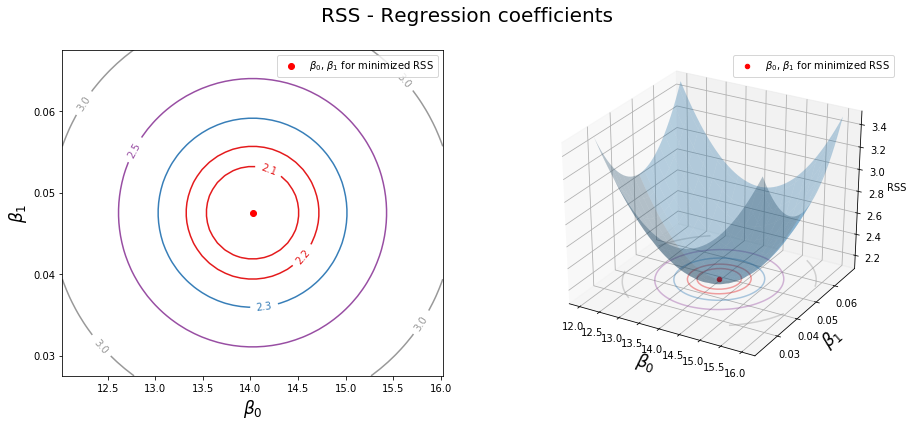

In [89]:
## refer code from https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%203.ipynb
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

2.9842337553505103
2.190618588148249


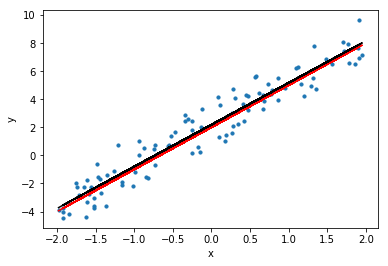

In [108]:
## figure 3.3
# simulate for f(X) = 2 + 3X
np.random.seed(0)
x = np.random.uniform(low=-2, high=2, size=(100,))
y = 2 + 3 * x + np.random.normal(0,1,100)
y_true = 2 + 3 * x

b0, b1= np.polyfit(x,y,1)
print(b0)
print(b1)


# plot
plt.scatter(x,y,s=10)
plt.plot(x, y_true, color ='red')
plt.plot(x, b1+b0*x, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [115]:
#TABLE 3.1 & 3.2
table3_1= smf.ols('Sales ~TV', data= ad).fit()
table3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.47e-42
Time:                        22:06:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# TABLE 3.4
table3_4= smf.ols('Sales ~TV +Radio +Newspaper', data= ad).fit()
table3_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.58e-96
Time:                        22:09:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
#TABLE 3.5. Correlation matrix for TV, radio, newspaper, and sales for the Advertising data.
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [12]:
boston= pd.DataFrame(boston_data.data)

In [13]:
boston.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
#find out no column name... Let's add column name in it
boston.columns=boston_data.feature_names
print(boston.columns)
#add MEDV column
boston['MEDV']= boston_data.target
print(boston.head())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [20]:
from sklearn.preprocessing import scale
reg_model= linear_model.LinearRegression()

x= boston.LSTAT
y=boston.MEDV
model1 =reg_model.fit(x[:,None],y)

In [28]:
#show regression model's coefficient and intercept
print('coefficient is {}'.format(model1.coef_))
print('intercept is {}'.format(model1.intercept_))

coefficient is [-0.95004935]
intercept is 34.5538408793831


In [38]:
beta0= model1.intercept_
beta1 =model1.coef_
new_x = np.array([0,35])
new_y= new_x *beta1 +beta0

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

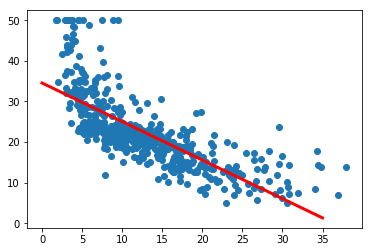

In [40]:
plt.scatter(x,y)
plt.plot(new_x, new_y, color ='red', linewidth = 3)
plt.xticks()
plt.yticks()
plt.show()

Multiple Linear Regression

In [51]:
x_m=boston[['LSTAT', 'AGE']].as_matrix()
y_m=boston['MEDV']
model2= reg_model.fit(x_m,y_m)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [54]:
print('coefficient values are {}'.format(model2.coef_))
print('intercept value is {}'.format(model2.intercept_))

coefficient values are [-1.03206856  0.03454434]
intercept value is 33.2227605317929


In [80]:
x_m2= boston.iloc[:,0:13].as_matrix()
y_m2= boston.iloc[:,-1]
model3= reg_model.fit(x_m2, y_m2)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [81]:
print('coefficient values are {}'.format(model3.coef_))
print('intercept value is {}'.format(model3.intercept_))

coefficient values are [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
intercept value is 36.45948838508978


In [ ]:
Applied Exercise

In [82]:
auto= pd.read_csv('/Users/YaoJunyan/Documents/ISLR_Python/Dataset/Auto.csv')

In [92]:
auto.describe()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [84]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


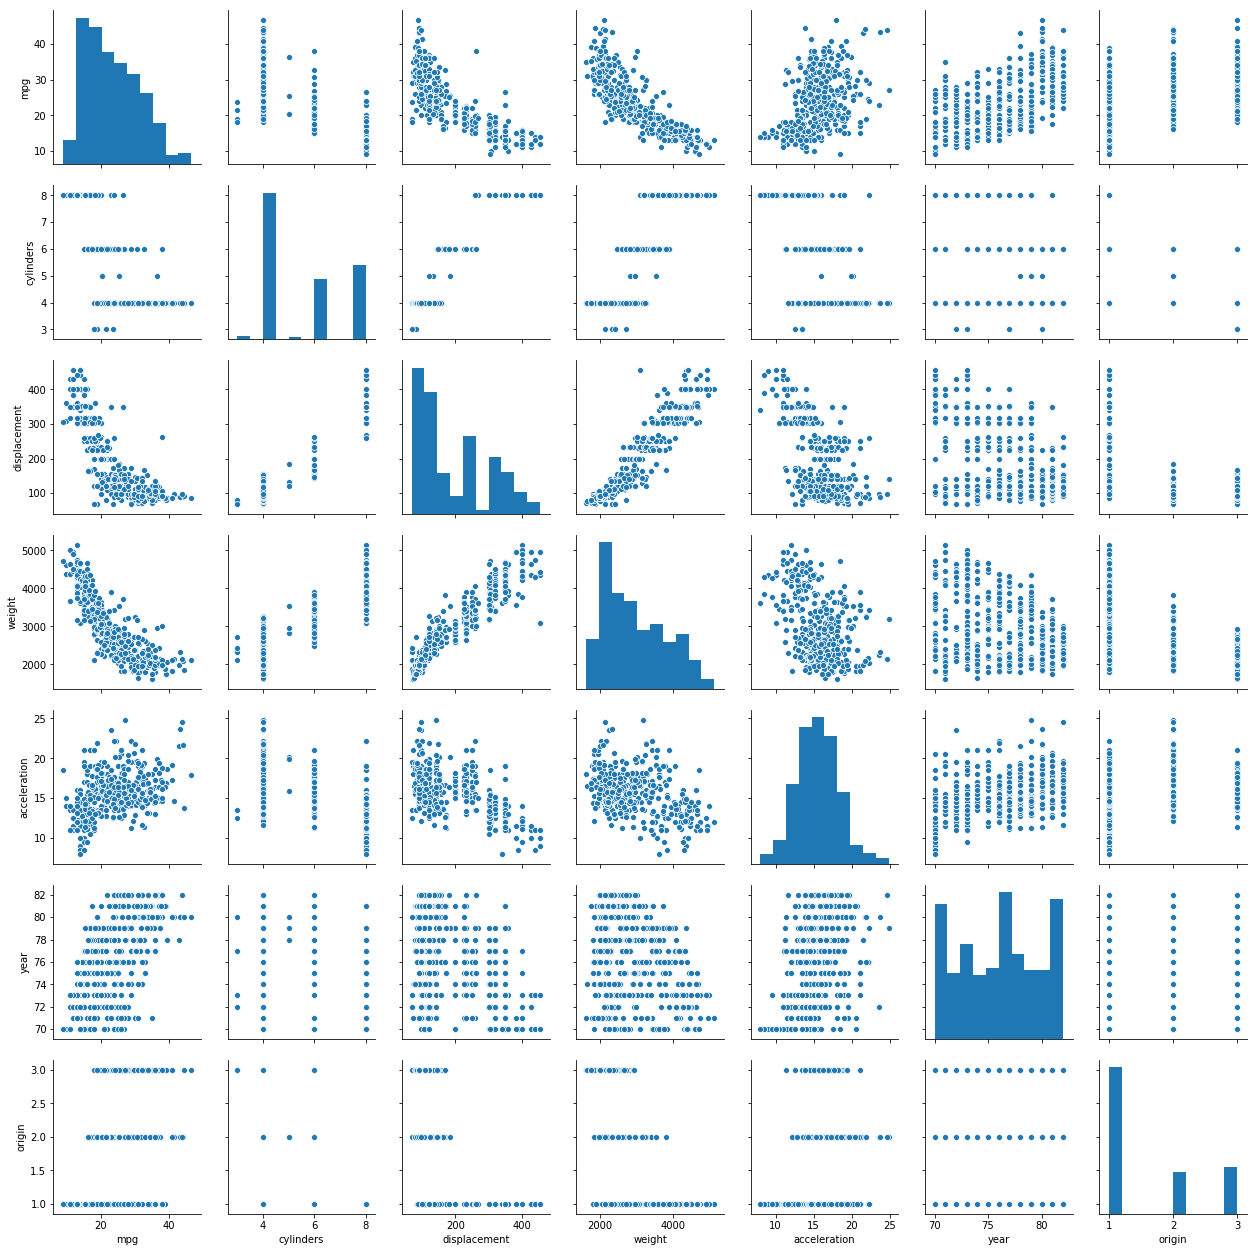

In [90]:
sns.pairplot(auto)

In [94]:
x_auto= auto['horsepower']
y_auto= auto['mpg']
model_auto = reg_model.fit(x[:,None],y)
auto_beta1=model_auto.coef_
auto_beta0=model_auto.intercept_

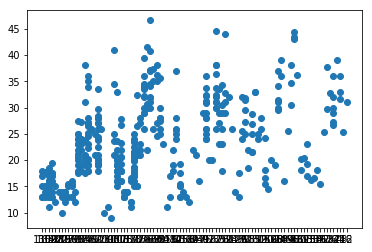

In [100]:
plt.scatter(x_auto, y_auto)
#auto_newx= np.array([60,200])
#auto_newline = auto_newx * auto_beta1+ auto_beta0
#plt.plot(auto_newline, color= 'red', linewidth =3)